# Intro to Pandas
http://pandas.pydata.org/

In [ ]:
from IPython.display import Image
Image(url='panda1.jpg')

# Contents
1. What is Pandas
2. Why Pandas
3. Datatypes
4. Getting data into Pandas
5. Merging dataframes
6. Getting subsets of your data (slicing, etc)
7. Plotting

# What is Pandas

"...fast, easy-to-use data wrangling and statistical computing tool..."

I like to think of it as a *dict like object* that can queried in additional SQL-y kind of way. 
A bit like a Django Model instance.

Created by Wes McKinney in 2007.

Built on top of NumPy

DataFrame heavily influenced by R DataFrame

# Why Pandas

Because R ![Scream](scream.png "R")

# Datatypes

1.	**Series**:	    1D labeled homogeneously-typed array [1,2,3,4,5] 
2.	**DataFrame**:	General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
3.	**Panel**:	    General 3D labeled, also size-mutable array **(not going to be covered in this talk)**

*'...The best way to think about the pandas data structures is as flexible containers for lower dimensional data. For example, DataFrame is a container for Series, and Panel is a container for DataFrame objects. We would like to be able to insert and remove objects from these containers in a dictionary-like fashion.'*


# Series

In [ ]:
import pandas as pd

In [ ]:
# a scalar value
pd.Series(1)

In [ ]:
a = pd.Series([1,2,3,6,7,9])
print(a)
# Accessing elements
# Index look up, Element 0th, 1st element
a[0]
# Using a mask !We'll be coming back to this, it's a biggy
a[a > 6]

In [ ]:
a = pd.Series(range(4), index=('a', 'b', 'c', 'd'))
a['c']

In [ ]:
data = {'a' : 0., 'b' : 1., 'c' : 2.}
a = pd.Series(data)
print(a)
print(a.b)
print(a['c'])
print(a[1:])

In [ ]:
#Why no error? I thought series where 'homogeneous'
pd.Series(['1', 3, 'c'])

They are :-) Look at the dtype, it's all the same type, an object type

Pandas is built on top of numpy, we should look into that...

In [ ]:
import numpy as np
a = pd.Series(np.random.randn(5))
print(a)

In [ ]:
a.sum()

In [ ]:
a.median()

In [ ]:
a.count()

Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions

In [ ]:
a.append(3) # Error

Told you they were homogeneous

In [ ]:
a = a.append(pd.Series([99,100,22], index=('what', 'the', 'magic')))

In [ ]:
a.magic

In [ ]:
a.index

# Getting data into Pandas

* **read_csv**
* read_excel
* read_hdf
* read_sql
* read_json
* read_html
* read_stata
* read_sas
* read_clipboard
* read_pickle

# DataFrame

In [96]:
users = [(1, "Jean-Luc", "Picard", "Enterprise", "locutus.2366@enterprise.subspace"), 
         (2, "Geordi", "La Forge", "Enterprise", "reading.rainbow@enterprise.subspace"), 
         (3, "Kathryn", "Janeway", "Voyager", "cap.delta.q@voyager.subspace"), 
         (4, "B'Elanna", "Torres", "Voyager", "warp.drives.rule@voyager.subspace"),
         (5, "Benjamin", "Sisko", "DS9", "shut.up.quark@ds9.subspace"),
         (6, "Kira", "Nerys", "DS9", "cardassian.scum@ds9.subspace")
         ]

users = pd.DataFrame(users, columns=['id', 'first_name', 'last_name', 'ship', 'email'])
users

,id,first_name,last_name,ship,email
0,1,Jean-Luc,Picard,Enterprise,locutus.2366@enterprise.subspace
1,2,Geordi,La Forge,Enterprise,reading.rainbow@enterprise.subspace
2,3,Kathryn,Janeway,Voyager,cap.delta.q@voyager.subspace
3,4,B'Elanna,Torres,Voyager,warp.drives.rule@voyager.subspace
4,5,Benjamin,Sisko,DS9,shut.up.quark@ds9.subspace
5,6,Kira,Nerys,DS9,cardassian.scum@ds9.subspace


In [43]:
users.set_index('ID')

,FirstName,LastName,Ship,Email
ID,,,,
1,Jean-Luc,Picard,Enterprise,locutus.2366@enterprise.subspace
2,Geordi,La Forge,Enterprise,reading.rainbow@enterprise.subspace
3,Kathryn,Janeway,Voyager,cap.delta.q@voyager.subspace
4,B'Elanna,Torres,Voyager,warp.drives.rule@voyager.subspace
5,Benjamin,Sisko,DS9,shut.up.quark@ds9.subspace
6,Kira,Nerys,DS9,cardassian.scum@ds9.subspace


In [67]:
import csv
from uuid import uuid4
from datetime import datetime, timedelta
from random import randrange, choice, randint

def random_date(start, end):
    """
    http://stackoverflow.com/a/553448
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

_end_date = datetime.now()
_start_date = end_date - timedelta(weeks=300)

available_numbers = ['55500001', '55500002', '55500003', '55500004', '55500005', 
                     '55500006', '55500007']


with open('cdrs.csv', 'w', newline='') as csvfile:
    cdrwriter = csv.writer(csvfile, delimiter=',')
    cdrwriter.writerow('id,uuid,caller_number,destination_number,context,start_stamp,end_stamp,duration,billsec,hangup_cause,accountcode,read_codec,user_id'.split(','))

    for _cdr_count in range(1, 10001):
        _cdr_start_dtstamp = random_date(_start_date, _end_date)
        _call_duration = randint(0, 1000)
        billsec = _call_duration - 5 if (_call_duration - 5) >= 0 else 0

        if billsec == 0: 
            hangup_cause = 'No Anwser'
        else: 
            hangup_cause = 'Anwser'

        _cdr_end_dtstamp = _cdr_start_dtstamp + timedelta(seconds=_call_duration)

        user_id = randint(1,6)
        cdrwriter.writerow([_cdr_count, uuid4(), choice(available_numbers), choice(available_numbers), 'FUTILE', _cdr_start_dtstamp, _cdr_end_dtstamp, _call_duration, billsec, hangup_cause, 'Blah', 'Whoop', user_id])


In [68]:
import pandas as pd
_cdr = pd.read_csv('cdrs.csv')
_cdr.head(3)

,id,uuid,caller_number,destination_number,context,start_stamp,end_stamp,duration,billsec,hangup_cause,accountcode,read_codec,user_id
0,1,7a7af69c-29d3-4651-93be-6a0582270955,55500007,55500003,FUTILE,2015-08-25 04:49:00.190694,2015-08-25 04:59:10.190694,610,605,Anwser,Blah,Whoop,3
1,2,9ff4db80-a25e-4668-8668-7c4bc0107ec2,55500005,55500004,FUTILE,2011-01-11 02:04:09.190694,2011-01-11 02:08:29.190694,260,255,Anwser,Blah,Whoop,6
2,3,20c4483f-9404-4171-80cc-7d1f3bda28d0,55500007,55500006,FUTILE,2014-07-06 20:00:59.190694,2014-07-06 20:07:43.190694,404,399,Anwser,Blah,Whoop,5


In [69]:
pd.set_option('display.max_columns', 1)
_cdr.head(2)

,id,...
0,1,...
1,2,...


In [71]:
# default is 20, back to default 
pd.set_option('display.max_columns', 20)
_cdr.head(1)

,id,uuid,caller_number,destination_number,context,start_stamp,end_stamp,duration,billsec,hangup_cause,accountcode,read_codec,user_id
0,1,7a7af69c-29d3-4651-93be-6a0582270955,55500007,55500003,FUTILE,2015-08-25 04:49:00.190694,2015-08-25 04:59:10.190694,610,605,Anwser,Blah,Whoop,3


In [131]:
_cdr = pd.read_csv('cdrs.csv', usecols=['caller_number', 'destination_number', 'start_stamp' ,'end_stamp', 'duration', 
                                        'billsec', 'hangup_cause', 'user_id'], 
                               dtype={'caller_number': 'int', 'caller_number': 'str'}, 
                               index_col='start_stamp', 
                               parse_dates=['start_stamp', 'end_stamp'])

_cdr.head(3)

,caller_number,destination_number,end_stamp,duration,billsec,hangup_cause,user_id
start_stamp,,,,,,,
2015-08-25 04:49:00.190694,55500007,55500003,2015-08-25 04:59:10.190694,610,605,Anwser,3
2011-01-11 02:04:09.190694,55500005,55500004,2011-01-11 02:08:29.190694,260,255,Anwser,6
2014-07-06 20:00:59.190694,55500007,55500006,2014-07-06 20:07:43.190694,404,399,Anwser,5


# Merging dataframes

In [132]:
_cdr = _cdr.merge(users, how='inner', left_on='user_id', right_index=True)
_cdr.head(5)

,caller_number,destination_number,end_stamp,duration,billsec,hangup_cause,user_id,id,first_name,last_name,ship,email
start_stamp,,,,,,,,,,,,
2015-08-25 04:49:00.190694,55500007,55500003,2015-08-25 04:59:10.190694,610,605,Anwser,3,4,B'Elanna,Torres,Voyager,warp.drives.rule@voyager.subspace
2014-03-13 22:55:18.190694,55500004,55500003,2014-03-13 23:01:21.190694,363,358,Anwser,3,4,B'Elanna,Torres,Voyager,warp.drives.rule@voyager.subspace
2012-02-08 19:16:16.190694,55500006,55500004,2012-02-08 19:21:06.190694,290,285,Anwser,3,4,B'Elanna,Torres,Voyager,warp.drives.rule@voyager.subspace
2011-04-01 11:41:41.190694,55500006,55500006,2011-04-01 11:45:19.190694,218,213,Anwser,3,4,B'Elanna,Torres,Voyager,warp.drives.rule@voyager.subspace
2013-03-05 11:08:42.190694,55500002,55500002,2013-03-05 11:09:17.190694,35,30,Anwser,3,4,B'Elanna,Torres,Voyager,warp.drives.rule@voyager.subspace


In [81]:
_cdr[:12]['billsec']

start_stamp
2015-08-25 04:49:00.190694    605
2014-03-13 22:55:18.190694    358
2012-02-08 19:16:16.190694    285
2011-04-01 11:41:41.190694    213
2013-03-05 11:08:42.190694     30
2016-04-01 02:16:18.190694    940
2013-03-19 14:58:28.190694    237
2012-11-26 23:29:44.190694      0
2012-10-05 15:50:10.190694    497
2011-04-23 17:43:00.190694    942
2014-09-15 05:39:14.190694    307
2011-09-10 01:54:45.190694    486
Name: billsec, dtype: int64

In [87]:
billsec = _cdr['billsec']
billsec.mean()

497.29899135446686

In [88]:
_cdr['caller_number'].value_counts()

55500006    1230
55500002    1229
55500001    1200
55500004    1195
55500005    1192
55500003    1164
55500007    1118
Name: caller_number, dtype: int64

In [89]:
_cdr['hangup_cause'].unique()

array(['Anwser', 'No Anwser'], dtype=object)

In [98]:
_cdr.groupby('hangup_cause').count()

,caller_number,destination_number,end_stamp,duration,billsec,user_id,id,first_name,last_name,ship,email
hangup_cause,,,,,,,,,,,
Anwser,8278,8278,8278,8278,8278,8278,8278,8278,8278,8278,8278
No Anwser,50,50,50,50,50,50,50,50,50,50,50


In [93]:
_cdr.groupby('hangup_cause').user_id.count()

hangup_cause
Anwser       8278
No Anwser      50
Name: user_id, dtype: int64

In [105]:
_cdr['email'] == 'shut.up.quark@ds9.subspace' 

start_stamp
2015-08-25 04:49:00.190694    False
2014-03-13 22:55:18.190694    False
2012-02-08 19:16:16.190694    False
2011-04-01 11:41:41.190694    False
2013-03-05 11:08:42.190694    False
2016-04-01 02:16:18.190694    False
2013-03-19 14:58:28.190694    False
2012-11-26 23:29:44.190694    False
2012-10-05 15:50:10.190694    False
2011-04-23 17:43:00.190694    False
2014-09-15 05:39:14.190694    False
2011-09-10 01:54:45.190694    False
2015-05-23 11:47:56.190694    False
2012-02-24 12:59:48.190694    False
2011-11-21 01:54:00.190694    False
2013-01-14 13:10:26.190694    False
2011-08-18 09:25:37.190694    False
2014-04-19 08:19:53.190694    False
2015-01-14 11:57:27.190694    False
2016-01-01 10:51:21.190694    False
2011-05-22 07:38:33.190694    False
2014-01-30 07:55:18.190694    False
2010-11-04 22:02:57.190694    False
2010-12-01 09:16:18.190694    False
2016-01-05 13:53:25.190694    False
2015-01-19 17:27:05.190694    False
2013-05-18 20:57:33.190694    False
2015-04-04 06:42

In [110]:
ben_cdrs = _cdr[_cdr['email'] == 'shut.up.quark@ds9.subspace']
ben_cdrs.head(2)

,caller_number,destination_number,end_stamp,duration,billsec,hangup_cause,user_id,id,first_name,last_name,ship,email
start_stamp,,,,,,,,,,,,
2012-07-25 19:53:46.190694,55500001,55500006,2012-07-25 20:09:27.190694,941,936,Anwser,4,5,Benjamin,Sisko,DS9,shut.up.quark@ds9.subspace
2015-11-22 05:12:36.190694,55500002,55500003,2015-11-22 05:16:15.190694,219,214,Anwser,4,5,Benjamin,Sisko,DS9,shut.up.quark@ds9.subspace


In [112]:
ben_cdrs.caller_number.count()

1672

In [117]:
_cdr[(_cdr['email'] == 'shut.up.quark@ds9.subspace') & (_cdr['hangup_cause'] == 'Anwser')].caller_number.count()

1665

In [116]:
_cdr[(_cdr['email'] == 'shut.up.quark@ds9.subspace') & (_cdr['hangup_cause'] == 'No Anwser')].caller_number.count()

7

In [84]:
_cdr.groupby('caller_number').count().sort_values('destination_number', ascending=False).head(3)

,destination_number,end_stamp,duration,billsec,hangup_cause,user_id,ID,FirstName,LastName,Ship,Email
caller_number,,,,,,,,,,,
55500006,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230
55500002,1229,1229,1229,1229,1229,1229,1229,1229,1229,1229,1229
55500001,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200


# Plotting


In [120]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

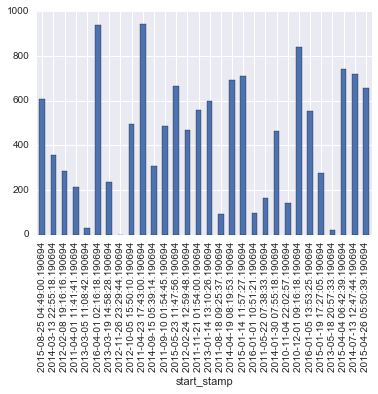

In [121]:
billsec = _cdr[:30]['billsec']
billsec.plot(kind='bar')

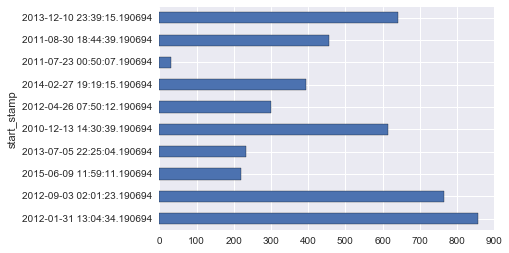

In [129]:
import matplotlib.pyplot as plt_cdr[_cdr['email'] == 'reading.rainbow@enterprise.subspace'][:10].billsec.plot(kind='barh')

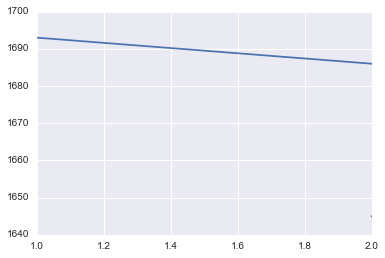

In [158]:
_cdr['user_id'].value_counts().plot()

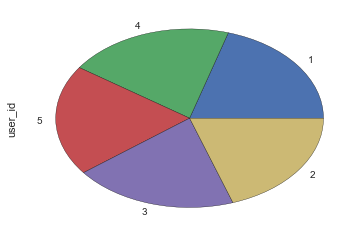

In [159]:
_cdr['user_id'].value_counts().plot(kind='pie')